In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#Read the dataset
data_iris=pd.read_csv('iris.csv')


In [12]:
data_iris
#Deleting the column in the dataset by using drop method
#data_iris=iris.drop(column=['column_name'])

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [15]:
data_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [20]:
data_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [23]:
data_iris.shape

(150, 5)

In [25]:
data_iris.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [126]:
data_iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [29]:
#It shows the how many values are present in the class label
data_iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [31]:
#x values are independent values
x=data_iris.drop('species',axis=1)
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [39]:
#y is dependent variable
y=data_iris['species']
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [46]:
#Dealing with categorical data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
data_iris['species']=y
data_iris['species']
data_iris['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [84]:
#Training the dataset.ANd test and training dataset division
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [85]:
x_train
#After division
x_train.shape

(120, 4)

In [86]:
x_test
x_test.shape

(30, 4)

In [87]:
#Apply the classification Algorithm
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion='entropy')

In [88]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [89]:
y_pred=clf.predict(x_test)
y_pred

array([2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 1, 2], dtype=int64)

In [91]:
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_pred,y_test)*100)

Accuracy: 96.66666666666667


In [98]:
from sklearn.metrics import classification_report

In [104]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        11\n           1       0.83      1.00      0.91         5\n           2       1.00      0.93      0.96        14\n\n    accuracy                           0.97        30\n   macro avg       0.94      0.98      0.96        30\nweighted avg       0.97      0.97      0.97        30\n'

In [106]:
from sklearn.metrics import confusion_matrix

In [111]:
print("Confusion Matrix: ",confusion_matrix(y_pred,y_test))

Confusion Matrix:  [[11  0  0]
 [ 0  5  0]
 [ 0  1 13]]


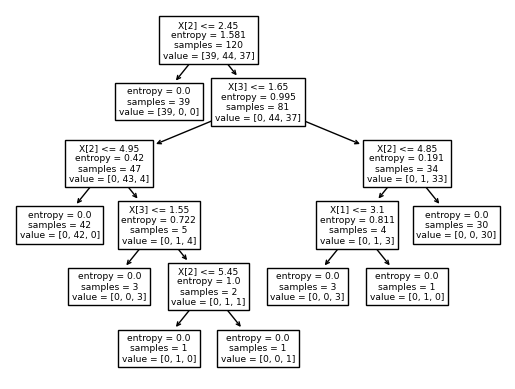

In [115]:
from sklearn import tree
tree.plot_tree(clf)
plt.show()

In [122]:
# Predict the value
x=[[6.5,3.5,2.3,3.5]]
y_pred=clf.predict(x)
y_pred

C:\Users\ML Lab\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [124]:
x=[[5.8,3.1,5.2,1.9]]
y_pred=clf.predict(x)
y_pred

C:\Users\ML Lab\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([2], dtype=int64)

In [127]:
x=[[5.1,3.2,1.5,0.3]]
y_pred=clf.predict(x)
y_pred

C:\Users\ML Lab\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [133]:
x=[[5.2,3.3,2.6,1.5]]
y_pred=clf.predict(x)
y_pred

C:\Users\ML Lab\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)